### Setup

In [1]:
import importlib
import analysis_functions
from analysis_functions import *

%load_ext autoreload
%autoreload 2

/Users/ariliu/opt/anaconda3/envs/iblenv/lib/python3.10/site-packages/ibllib/atlas/__init__.py:205: DeprecationWarning: ibllib.atlas is deprecated. Please install iblatlas using "pip install iblatlas" and use this module instead
  warnings.warn('ibllib.atlas is deprecated. Please install iblatlas using "pip install iblatlas" and use '


In [5]:
importlib.reload(analysis_functions)
from analysis_functions import *

In [6]:
# set parameters

ptype = 'p_mean_c'
combined_p = True
sc_threshold = 0.0
slope_threshold = 0.05
amp_loc_threshold = 67
n = 20

### plot region categorization histogram

In [345]:
sc_threshold = 0.0
slope_threshold = 0.05
amp_loc_threshold = 67
n = 20
times = ['stim_duringstim_act', 'choice_duringstim_act', 'stim_duringchoice_act', 'choice_duringchoice_act']
ptype = 'p_mean_c'
alpha = 0.01

res = get_sc_table(times, ptype, alpha=alpha, sc_threshold=sc_threshold, 
                   slope_threshold=slope_threshold, amp_loc_threshold=amp_loc_threshold, n=n)

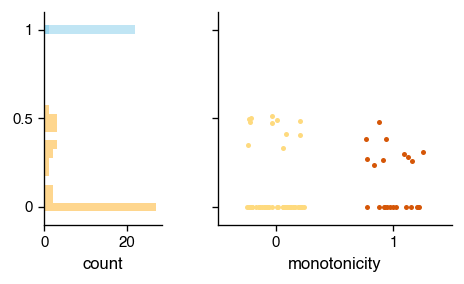

In [346]:
sc_duringstim = np.array(res['sc_duringstim'])
sc_duringchoice = np.array(res['sc_duringchoice'])
# sc_duringstim_mv = np.array(res['sc_duringstim_move_shape'].fillna(0))
sc_duringchoice_mv = np.array(res['sc_duringchoice_move_shape'].fillna(0))

# Fill NaNs only in the binary mv variables
# sc_duringstim_mv = np.nan_to_num(sc_duringstim_mv, nan=0)
sc_duringchoice_mv = np.nan_to_num(sc_duringchoice_mv, nan=0)

sc_duringstim_mv = np.zeros_like(sc_duringstim, dtype=float)

# Build DataFrames
df_stim = pd.DataFrame({
    "sc_duringstim_mv": sc_duringstim_mv,
    "sc_duringstim": sc_duringstim
})
df_choice = pd.DataFrame({
    "sc_duringchoice_mv": sc_duringchoice_mv,
    "sc_duringchoice": sc_duringchoice
})

# Highlight subsets
move_choice = df_choice[res['sc_duringchoice_regtype']==1]
stim_choice = df_choice[res['sc_duringchoice_regtype']==0]
int_choice = df_choice[res['sc_duringchoice_regtype']==0.5]
move_stim = df_stim[res['sc_duringstim_regtype']==1]
stim_stim = df_stim[res['sc_duringstim_regtype']==0]
stim_stim1 = df_stim[res['sc_duringstim_regtype']==0.1]
int_stim = df_stim[res['sc_duringstim_regtype']==0.5]

fig, axes = plt.subplots(1, 2, figsize=(4.5, 3), dpi=120, gridspec_kw={'width_ratios': [1, 2]}, sharey=True)

# sns.stripplot(
#     x="sc_duringstim_mv", y="sc_duringstim", data=int_stim,
#     color='#fec65f', jitter=0.25, ax=axes[0], size=3
# )

# sns.stripplot(
#     x="sc_duringstim_mv", y="sc_duringstim", data=move_stim,
#     color='#fec65f', jitter=0.25, ax=axes[0], size=3
# )

# sns.stripplot(
#     x="sc_duringstim_mv", y="sc_duringstim", data=stim_stim,
#     color='#57C1EB', jitter=0.25, ax=axes[0], size=3
# )

bin_centers = np.linspace(0, 1, 21)  # centers exactly at 0, 0.1, ..., 1
bin_width = bin_centers[1] - bin_centers[0]
bin_edges = np.concatenate(([bin_centers[0] - bin_width/2], bin_centers + bin_width/2))

inv_move_stim = 1 - pd.concat([int_stim["sc_duringstim"], move_stim["sc_duringstim"]])
inv_stim_stim = 1 - stim_stim["sc_duringstim"]
inv_stim_stim1 = 1 - stim_stim1["sc_duringstim"]
axes[0].hist(inv_move_stim, orientation='horizontal',
             color='#fec65f', alpha=0.7, bins=bin_edges)
axes[0].hist(inv_stim_stim, orientation='horizontal',
             color='#57C1EB', alpha=0.7, bins=bin_edges)
# offset the lighter bars slightly upward so they appear above inv_stim_stim
bin_shift = (bin_edges[1] - bin_edges[0]) / 4
axes[0].hist(inv_stim_stim1 + bin_shift, orientation='horizontal',
             color='#A6DBF0', alpha=0.7, bins=bin_edges)

# Invert y-values (1 - original)
int_choice_inv = int_choice.copy()
move_choice_inv = move_choice.copy()
stim_choice_inv = stim_choice.copy()

for df in [int_choice_inv, move_choice_inv, stim_choice_inv]:
    df["sc_duringchoice"] = 1 - df["sc_duringchoice"]

sns.stripplot(
    x="sc_duringchoice_mv", y="sc_duringchoice", data=int_choice_inv,
    color='#feda7e', jitter=0.25, ax=axes[1], size=3
)

sns.stripplot(
    x="sc_duringchoice_mv", y="sc_duringchoice", data=move_choice_inv,
    color='#d55607', jitter=0.25, ax=axes[1], size=3
)

sns.stripplot(
    x="sc_duringchoice_mv", y="sc_duringchoice", data=stim_choice_inv,
    color='#57C1EB', jitter=0.25, ax=axes[1], size=3
)

# axes[0].set_title("s_a")
# axes[1].set_title("m_a")

for ax in axes:
    # ax.axhline(sc_threshold, color="black", linestyle="--", linewidth=1)
    # ax.set_ylabel(r'$\sum$ choice', fontsize=10)
    ax.set_ylabel('')
    ax.tick_params(labelsize=9)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_facecolor('none')
    ax.set_ylim(-0.1, 1.1)
    ax.set_yticks([0, 0.5, 1])
    ax.set_yticklabels([0, 0.5, 1])

# axes[0].set_xlabel('')
# axes[0].set_xticks([])
# axes[0].set_xticklabels([])
axes[1].set_xticks([0, 1])
axes[1].set_xlim(-0.5, 1.5)
axes[1].set_xticklabels([0, 1])

axes[0].set_xlabel('count', fontsize=10)
axes[1].set_xlabel('monotonicity', fontsize=10)

fig.tight_layout(pad=3)

save_dir = '/Users/ariliu/Desktop/ibl-figures'
fig.savefig(f'{save_dir}/sc_strip_{alpha}.svg', transparent=True)

In [ ]:
sc_duringstim = np.array(res['sc_duringstim'])
sc_duringchoice = np.array(res['sc_duringchoice'])
# sc_duringstim_mv = np.array(res['sc_duringstim_move_shape'].fillna(0))
sc_duringchoice_mv = np.array(res['sc_duringchoice_move_shape'].fillna(0))


fig, axs = plt.subplots(1,2, sharey=True, figsize=(4,2),dpi=120)

axs[0].hist(sc_duringstim)
axs[1].hist(sc_duringchoice)
for ax in axs:
    ax.set_xlabel(r'$\sum$ choice', fontsize=10)
    ax.tick_params(labelsize=9)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axs[0].set_title('during stim')
axs[1].set_title('during choice')
axs[0].set(ylabel='num regions')
fig.tight_layout

save_dir = '/Users/ariliu/Desktop/ibl-figures'
fig.savefig(f'{save_dir}/sc_hist.pdf')

## distance trajectory plots

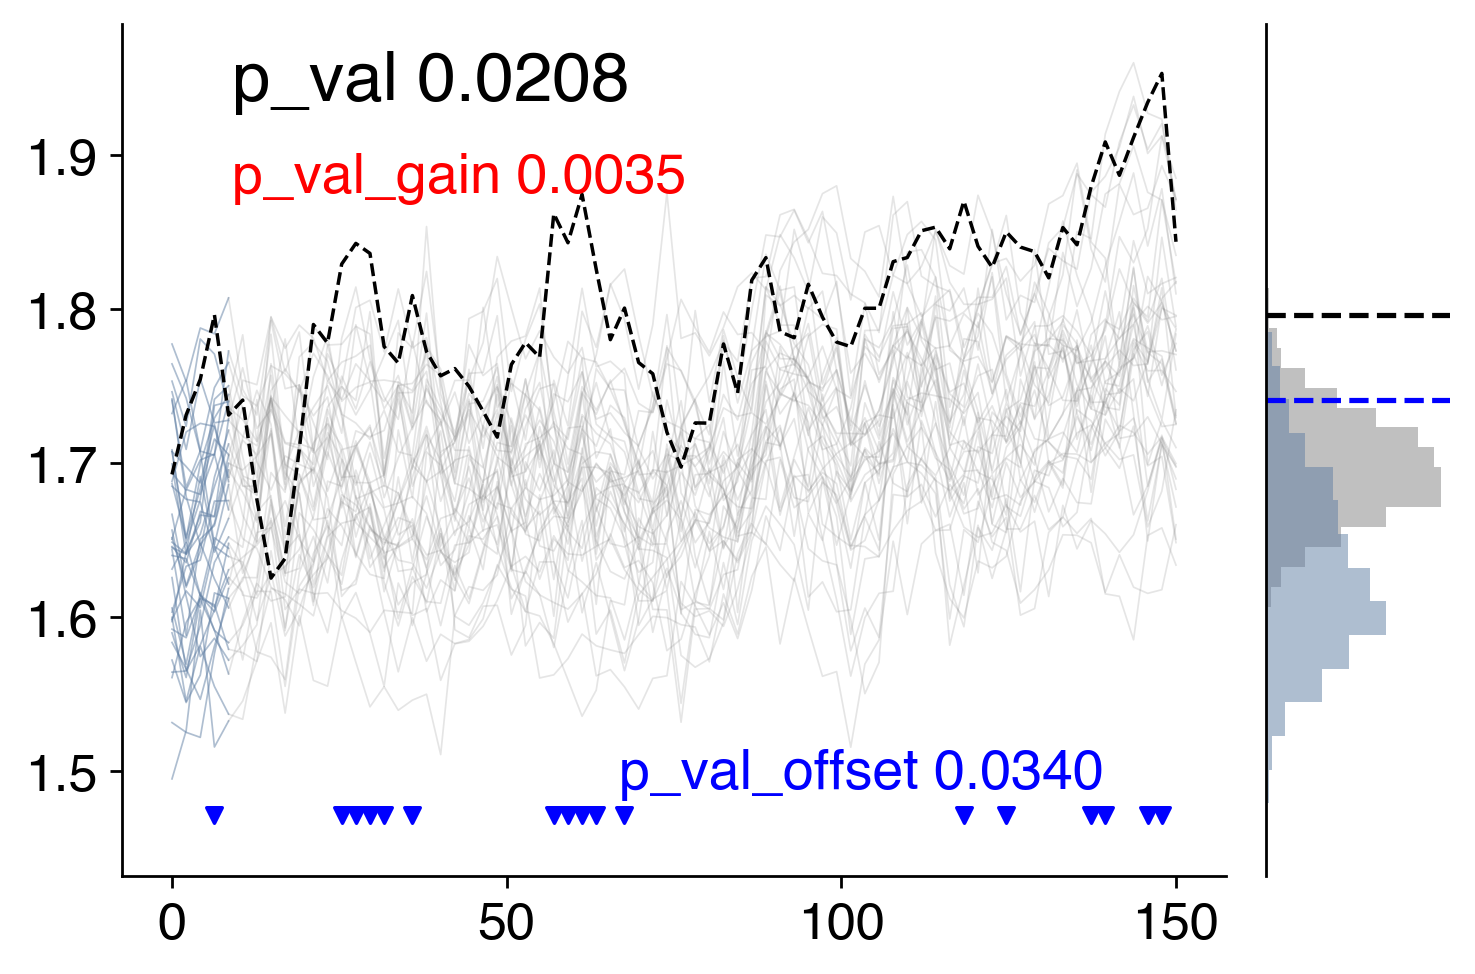

In [13]:
reg = 'SIM'
dist='de'
ptype = 'p_mean_c'
alpha = 0.01
p_mean_early=False

timeframes=['act_block_duringstim']
# timeframes=['act_intertrial0', 'act_intertrial0_old']
# timeframes=['act_intertrial0']
# timeframes=['choice_duringstim_act']
# timeframes=['stim_duringstim1_act']
for timeframe in timeframes:

    # for split in splits:
    #     print(split)
    #     plot_regional_distance(reg, split, timeframe, ptype=ptype, plot_p_per_time=True)
    r = plot_regional_distance(reg, timeframe, ptype=ptype, alpha=alpha, dist=dist,
                           plot_p_per_time=True, plot_gain=True, plot_offset=True,
                           show_y=True, ylim=None, yticks=None, p_mean_early=p_mean_early)

# plot_regional_distance(reg, 'block_only', timeframe, ptype=ptype, plot_p_per_time=True)

In [4]:
# Get list of all integrator & movement regions
alpha=0.01
sc_times = ['stim_duringstim_act', 'choice_duringstim_act', 'stim_duringchoice_act', 'choice_duringchoice_act']
table = get_sc_table(sc_times, ptype=ptype, alpha=alpha, combined_p=True,
                         sc_threshold=sc_threshold, slope_threshold=slope_threshold, 
                         amp_loc_threshold=amp_loc_threshold, n=n)

all_int = set(table[table['sc_duringchoice_regtype']==0.5]['region']) | set(table[table['sc_duringstim_regtype']==0.5]['region'])
all_int = list(all_int)

all_move = set(table[table['sc_duringchoice_regtype']==1]['region']) | set(table[table['sc_duringstim_regtype']==1]['region'])
all_move = list(all_move)

amp_int 0.046519817546356146
amp_move 0.09815467409212819
amp_move/amp_int 2.10995397809372
amp_int 0.04113589205723067
amp_move 0.08333255978364296
amp_move/amp_int 2.0257871074658063


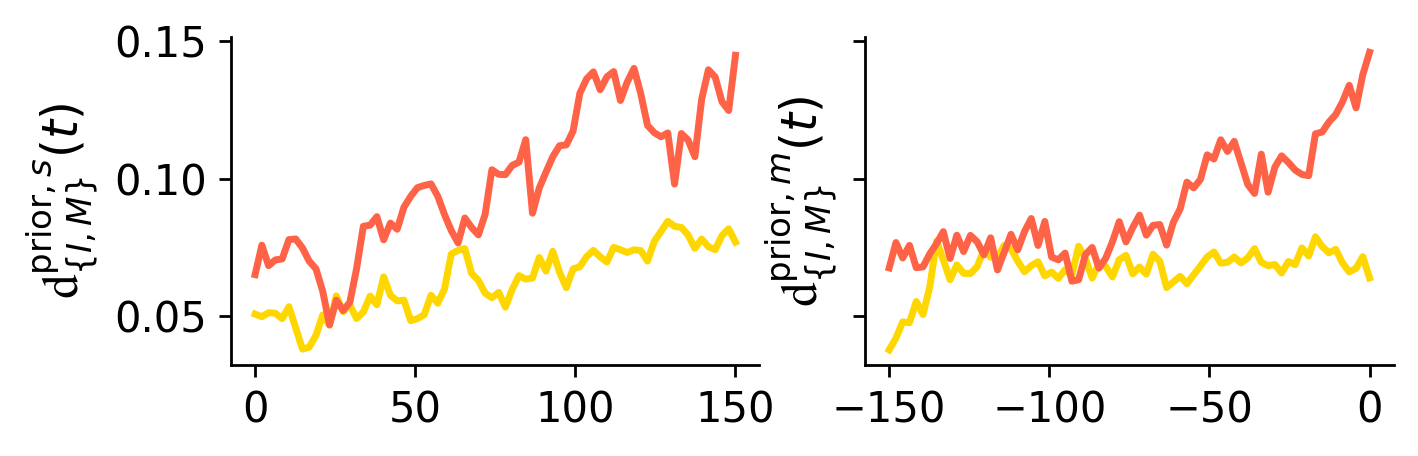

In [ ]:
timeframes = ('act_block_duringstim', 'act_block_duringchoice')
# timeframes = ('choice_duringstim_act', 'choice_duringchoice_act')

# regs_move = list(set(move_regs_stim) | set(move_regs_choice))
# regs_int = list(set(int_regs_stim) | set(int_regs_choice))

# regions = {'int_regs_choice': int_regs_choice, 'int_regs_stim': int_regs_stim,
#            'move_regs_choice': move_regs_choice, 'move_regs_stim': move_regs_stim}
# regions = {'int_regs_choice': regs_int, 'int_regs_stim': regs_int,
#            'move_regs_choice': regs_move, 'move_regs_stim': regs_move}
regions = {'int_regs_choice': all_int, 'int_regs_stim': all_int,
           'move_regs_choice': all_move, 'move_regs_stim': all_move}

dist='de'
# amp_ratio_choice, offset_ratio_choice = plot_group_comparison_over_regions(regions, timeframes)
amp_ratio_block, offset_ratio_block = plot_group_comparison_over_regions(regions, timeframes,
        correction='simple', dist=dist)

/Users/ariliu/int-brain-lab/paper-brain-wide-map/analysis_functions.py:902: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


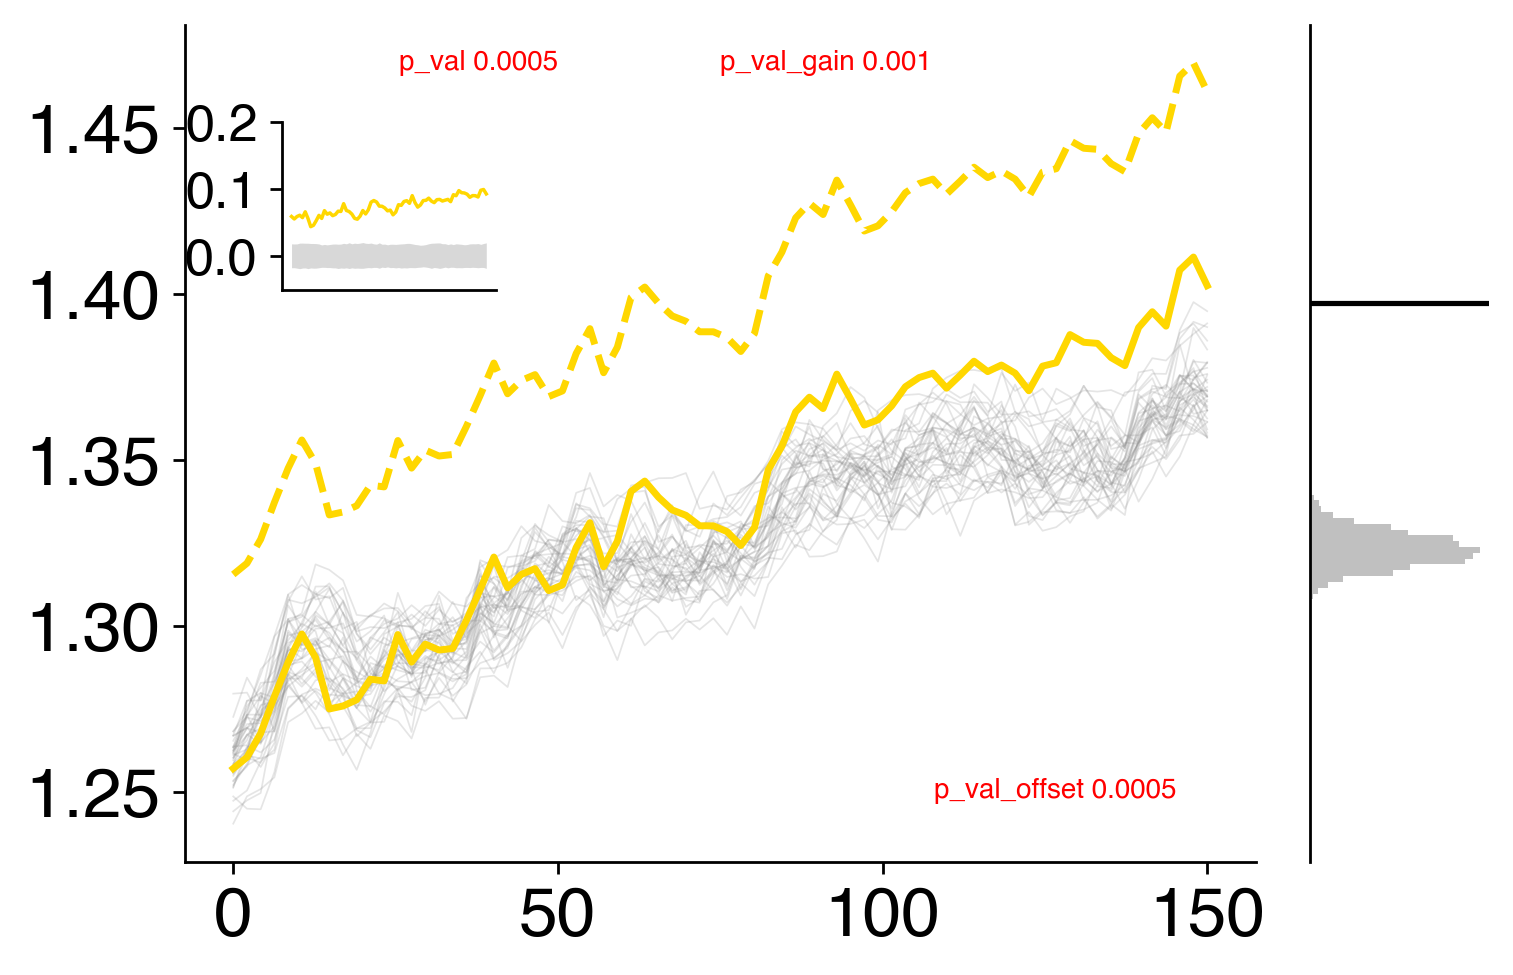

In [7]:
stim_regs = ['VISpm', 'VISal', 'FRP']
# stim_regs = ['VISpm', 'VISam', 'FRP', 'VISp', 'VISli', 'LGd', 'LP', 'NOT']
regs = all_int
# regs = stim_regs
name = 'int_regs'

timeframe='act_block_duringstim'
# timeframe='choice_duringstim_act'
# timeframe='intertrial'
# splits = run_align[timeframe]
# combined_name = 'combined_regde_'+"_".join(splits)

r_avg = plot_average_distance_over_regions(regs, timewindow=timeframe, name=name,
                                   ptype='p_mean_c', show_y=True, alpha=0.05,
                                   plot_p_per_time=False, plot_gain=True)

# for reg in regs:
#     plot_regional_distance(reg, timeframe, ptype=ptype, alpha=0.05, plot_p_per_time=True)
#     plt.close()

## process data p values

In [351]:
# for timeframe in run_align:
# for timeframe in ['act_block_duringstim', 'act_block_duringchoice']:
# for timeframe in ['block_duringstim', 'block_duringchoice', 'intertrial0']:
# for timeframe in ['stim_duringstim_act', 'choice_duringstim_act', 'stim_duringchoice_act', 
#         'choice_duringchoice_act', 'stim_duringstim_short_act', 'stim_duringstim1_act']:
for timeframe in ['stim_duringstim', 'choice_duringstim', 'stim_duringchoice', 
        'choice_duringchoice', 'stim_duringstim_short', 'stim_duringstim1']:
# for timeframe in ['act_intertrial_old']:
# for timeframe in ['act_intertrial0']:
    compute_amp_slope(timeframe, n=20)

In [14]:
dist='de'
alpha=0.01
# times = ['stim_duringstim_act', 'choice_duringstim_act', 'stim_duringchoice_act', 'choice_duringchoice_act',
#          'stim_duringstim_short_act']
# times = ['block_duringstim', 'block_duringchoice', 'intertrial', 'intertrial0']
# times = ['stim_duringstim_short_act']
times = ['act_block_duringstim', 'act_block_duringchoice']
# times = ['act_intertrial_old']
# times = ['act_intertrial0']

# for ptype in ['p_mean', 'p_amp', 'p_max', 'p_gain', 'p_offset']:
for ptype in ['p_gain']:
    for timeframe in times:
        compute_p_value(timeframe, ptype=ptype, dist=dist, alpha=alpha)
        fdr_combined(timeframe, ptype=ptype)

In [ ]:
timeframe = 'choice_duringstim'
splits = run_align[timeframe]
combined_name = 'combined_'+"_".join(splits)

d = np.load(Path(pth_res, f'{combined_name}.npy'), 
                    allow_pickle=True).flat[0]
for reg in ['GRN', 'VISp']:
    print(reg)
    print(d[reg]['p_mean'])
    print(d[reg]['p_mean_c'])
    print(d[reg]['p_amp'])
    print(d[reg]['p_amp_c'])
    print(d[reg]['p_max'])
    print(d[reg]['p_max_c'])
    # break


## plot tables

In [ ]:
# datatype = 'true_block'
# times = ['intertrial']
# times = ['block_duringchoice', 'block_duringstim', 'intertrial0']
# datatype = 'act_block'
# times=['act_intertrial0']
# times = ['act_intertrial_old']
# times = ['act_block_duringchoice', 'act_block_duringstim']
# datatype = 'stim_choice_act'
# times = ['stim_duringstim_short_act', 'stim_duringstim1_act', 'stim_duringstim_act', 'choice_duringstim_act', 
#          'stim_duringchoice_act', 'choice_duringchoice_act']

for alpha in [0.01]:
    table = plot_table(times, ptype=ptype, alpha=alpha, datatype=datatype)

# times = ['stim_duringstim0', 'choice_duringstim0', 'stim_duringchoice0', 'choice_duringchoice0']
# table = plot_table_combined(times, ptype=ptype, datatype='stimchoice0', alpha=alpha)

# times = ['stim_duringstim', 'choice_duringstim', 'stim_duringchoice', 'choice_duringchoice']
# table = plot_table_combined(times, ptype=ptype, datatype='stimchoice', alpha=alpha)

In [ ]:
times = ['stim_duringstim', 'choice_duringstim', 'stim_duringchoice', 'choice_duringchoice']
# times = ['stim_duringstim_act', 'choice_duringstim_act', 
#          'stim_duringchoice_act', 'choice_duringchoice_act']
metric = 'regtype'
# metric = 'move_shape'
# metric = 'sc'

# for alpha in [0.05, 0.01]:
for alpha in [0.01]:
    plot_sc_table(times, ptype, alpha=alpha, metric=metric, sc_threshold=sc_threshold,
                  slope_threshold=slope_threshold, amp_loc_threshold=amp_loc_threshold, n=n, stim_restr=True)

# for time in times:
#     res = manifold_to_csv(time, alpha, ptype)

In [18]:
# times = ['stim_duringstim', 'choice_duringstim', 'stim_duringchoice', 'choice_duringchoice']
times = ['stim_duringstim_act', 'choice_duringstim_act', 'stim_duringchoice_act', 'choice_duringchoice_act']

timing_splits = ['act_block_duringchoice', 'act_block_duringstim']
# timing_splits = ['block_duringchoice', 'block_duringstim']

for sigl in [0.01]:
    table = plot_combined_table_summary(times, timing_splits, ptype=ptype, alpha=sigl, alpha_sc=sigl,
                                combined_p=combined_p, sc_threshold=sc_threshold,
                                slope_threshold=slope_threshold, amp_loc_threshold=amp_loc_threshold, n=n,
                                display='gain_offset'
                                # display='overall'
                                )


In [118]:
times = ['stim_duringstim_act', 'choice_duringstim_act', 'stim_duringchoice_act', 'choice_duringchoice_act']
alpha = 0.01

# stim_regs = plot_combined_onetype(times, 'stim', ['act_block_duringstim'], ptype=ptype, combined_p=combined_p, n=n,
#                       sc_threshold=sc_threshold, alpha=alpha, slope_threshold=slope_threshold, amp_loc_threshold=amp_loc_threshold)
# move_regs_choice = plot_combined_onetype(times, 'move', ['act_block_duringchoice'], ptype=ptype, combined_p=combined_p, n=n,
#                       sc_threshold=sc_threshold, alpha=alpha, slope_threshold=slope_threshold, amp_loc_threshold=amp_loc_threshold)
int_regs_stim = plot_combined_onetype(times, 'integrator', ['act_block_duringstim'], ptype=ptype, combined_p=combined_p, n=n,
                      sc_threshold=sc_threshold, alpha=alpha, slope_threshold=slope_threshold, amp_loc_threshold=amp_loc_threshold)
int_regs_choice = plot_combined_onetype(times, 'integrator', ['act_block_duringchoice'], ptype=ptype, combined_p=combined_p, n=n,
                      sc_threshold=sc_threshold, alpha=alpha, slope_threshold=slope_threshold, amp_loc_threshold=amp_loc_threshold)
# move_regs_stim = plot_combined_onetype(times, 'move', ['act_block_duringstim'], ptype=ptype, combined_p=combined_p, n=n,
#                       sc_threshold=sc_threshold, alpha=alpha, slope_threshold=slope_threshold, amp_loc_threshold=amp_loc_threshold)


sc_duringstim_regtype act_block_duringstim
sc_duringchoice_regtype act_block_duringchoice


In [113]:
times = ['stim_duringstim_act', 'choice_duringstim_act', 'stim_duringchoice_act', 'choice_duringchoice_act']
alpha = 0.01

int_regs = plot_combined_onetype(times, 'integrator', ['act_block_duringstim', 'act_block_duringchoice'], 
                                      ptype=ptype, combined_p=combined_p, n=n, 
                                      sc_threshold=sc_threshold, alpha=alpha, slope_threshold=slope_threshold, 
                                      amp_loc_threshold=amp_loc_threshold, add_intertrial=False)

move_regs = plot_combined_onetype(times, 'move', ['act_block_duringstim', 'act_block_duringchoice'], 
                                      ptype=ptype, combined_p=combined_p, n=n, 
                                      sc_threshold=sc_threshold, alpha=alpha, slope_threshold=slope_threshold, 
                                      amp_loc_threshold=amp_loc_threshold, add_intertrial=False)


sc_duringstim_regtype act_block_duringstim
sc_duringchoice_regtype act_block_duringchoice
sc_duringstim_regtype act_block_duringstim
sc_duringchoice_regtype act_block_duringchoice


In [ ]:
alpha = 0.05
times = ['stim_duringstim', 'choice_duringstim', 'stim_duringchoice', 'choice_duringchoice']

stim_regs = plot_combined_onetype(times, 'stim', ['block_duringstim'], ptype=ptype, combined_p=combined_p, n=n,
                      sc_threshold=sc_threshold, alpha=alpha, slope_threshold=slope_threshold, amp_loc_threshold=amp_loc_threshold)
move_regs_choice = plot_combined_onetype(times, 'move', ['block_duringchoice'], ptype=ptype, combined_p=combined_p, n=n,
                      sc_threshold=sc_threshold, alpha=alpha, slope_threshold=slope_threshold, amp_loc_threshold=amp_loc_threshold)
int_regs_stim = plot_combined_onetype(times, 'integrator', ['block_duringstim'], ptype=ptype, combined_p=combined_p, n=n,
                      sc_threshold=sc_threshold, alpha=alpha, slope_threshold=slope_threshold, amp_loc_threshold=amp_loc_threshold)
int_regs_choice = plot_combined_onetype(times, 'integrator', ['block_duringchoice'], ptype=ptype, combined_p=combined_p, n=n,
                      sc_threshold=sc_threshold, alpha=alpha, slope_threshold=slope_threshold, amp_loc_threshold=amp_loc_threshold)
move_regs_stim = plot_combined_onetype(times, 'move', ['block_duringstim'], ptype=ptype, combined_p=combined_p, n=n,
                      sc_threshold=sc_threshold, alpha=alpha, slope_threshold=slope_threshold, amp_loc_threshold=amp_loc_threshold)
